Read image from devie

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('./media/Screenshot_20250511_225753_8 Ball Pool.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Coordinates of the quadrilateral (crop area)
crop_image = [(481, 256), (1939, 256), (1939, 985), (481, 985)]
polygon = np.array(crop_image, dtype=np.int32)

# Detect circles
circles = cv2.HoughCircles(
    blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
    param1=50, param2=30, minRadius=10, maxRadius=50
)

# Filter circles inside the polygon
filtered_circles = []
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        if cv2.pointPolygonTest(polygon, (float(x), float(y)), False) >= 0:
            filtered_circles.append((x, y, r))

# Draw filtered circles
for (x, y, r) in filtered_circles:
    cv2.circle(image, (x, y), r, (0, 255, 0), 4)
    cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

# Optional: Draw polygon boundary
cv2.polylines(image, [polygon], isClosed=True, color=(255, 0, 0), thickness=2)



array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [34, 18, 12],
        [21,  8,  6],
        [20,  8,  6]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [32, 15, 12],
        [30, 17, 15],
        [18,  6,  4]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [34, 19, 16],
        [32, 19, 17],
        [23, 11, 11]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [28, 16, 10],
        [31, 20, 16],
        [20,  9,  5]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [32, 20, 14],
        [26, 15, 11],
        [18,  9,  5]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [23, 13,  6],
        [23, 12,  8],
        [12,  3,  0]]], shape=(1080, 2340, 3), dtype=uint8)

## Get location of cue ball

In [44]:
def get_most_white_circle(image, circles):
    """
    Finds the circle with the most white pixels inside it.

    Args:
        image (np.ndarray): Original BGR image.
        circles (List[Tuple[int, int, int]]): List of circles as (x, y, radius).

    Returns:
        Tuple[int, int, int]: (x, y, r) of the circle with the most white pixels.
    """
    max_white_count = -1
    best_circle = None

    for (x, y, r) in circles:
        # Create a mask for the circle
        mask = np.zeros(image.shape[:2], dtype=np.uint8)
        cv2.circle(mask, (x, y), r, 255, thickness=-1)

        # Extract the circular region
        masked = cv2.bitwise_and(image, image, mask=mask)

        # Convert to grayscale
        gray = cv2.cvtColor(masked, cv2.COLOR_BGR2GRAY)

        # Threshold to isolate white areas (tweak if needed)
        _, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)

        # Count white pixels
        white_pixels = cv2.countNonZero(thresh)

        if white_pixels > max_white_count:
            max_white_count = white_pixels
            best_circle = (x, y, r)

    return best_circle

cue_ball_location = get_most_white_circle(image,filtered_circles)
if cue_ball_location:
    x, y, r = cue_ball_location
    print(f"Circle with most white: Center=({x}, {y}), Radius={r}")
    cv2.circle(image, (x, y), r, (0, 0, 255), 4)


Circle with most white: Center=(844, 473), Radius=26


## Show image

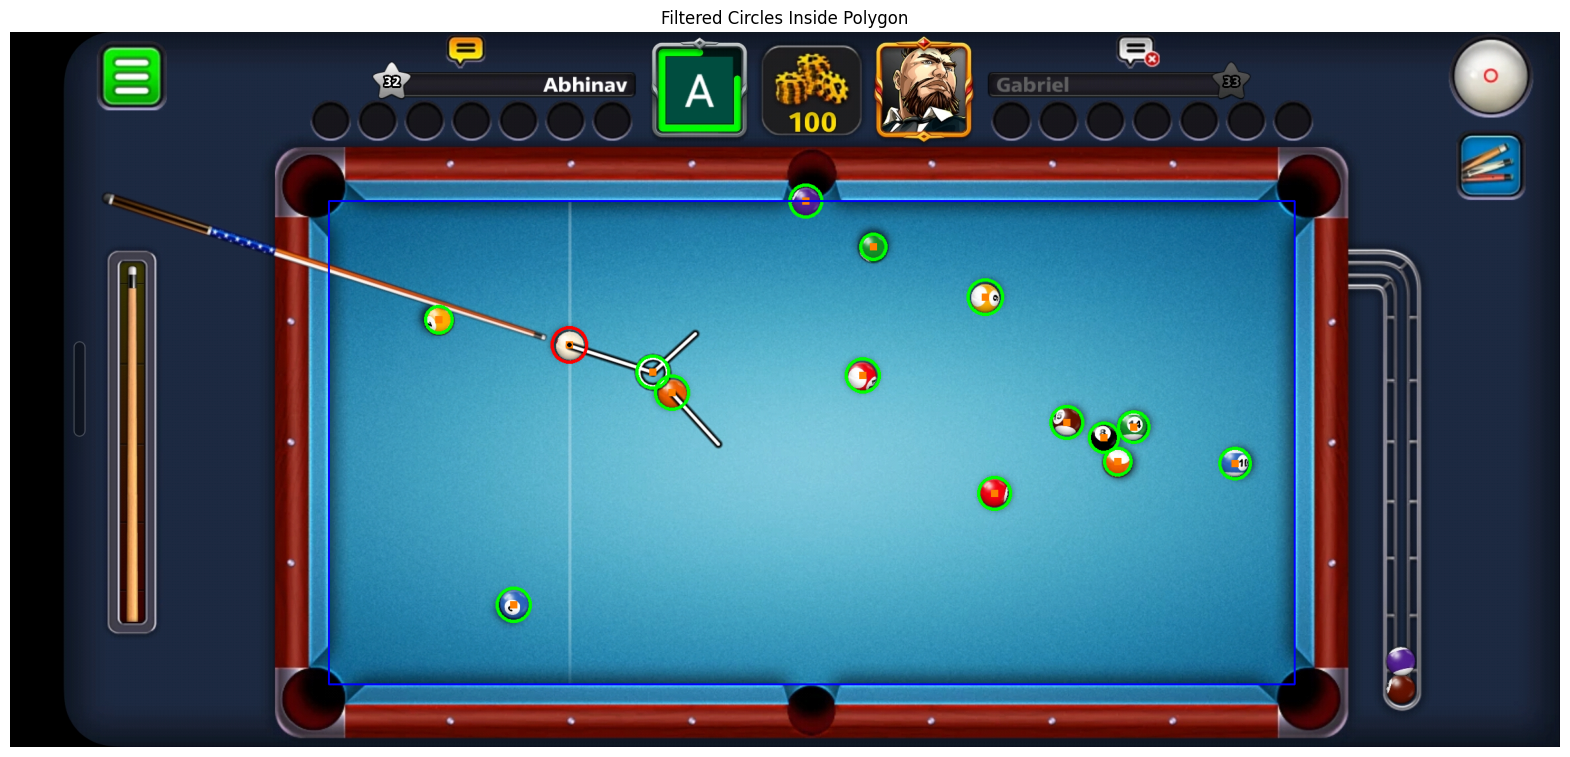

In [45]:
# Convert to RGB for displaying in Jupyter
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show result
plt.figure(figsize=(20, 20))
plt.imshow(image_rgb)
plt.title("Filtered Circles Inside Polygon")
plt.axis("off")
plt.show()